In [37]:
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings

path_to_file= r"/workspaces/project-final/vietnam_housing_dataset.csv"
vietnam_housing = pd.read_csv(r"/workspaces/project-final/vietnam_housing_dataset.csv")
vietnam_housing = vietnam_housing[['Address',	'Area',	'Frontage','Access Road',  'House direction',	'Balcony direction', 	'Floors',	'Bedrooms',	'Bathrooms',	'Legal status',	'Furniture state',	'Price']]

## Chia d·ªØ li·ªáu


In [38]:
from sklearn.model_selection import train_test_split
seed = 42
index_all = np.arange(vietnam_housing.shape[0])
index_train, index_test = train_test_split(index_all, test_size=0.33, random_state=seed)

In [39]:
vietnam_housing_train = vietnam_housing.iloc[index_train]
vietnam_housing_test  = vietnam_housing.iloc[index_test]
print(f"train: {len(vietnam_housing_train)} / test: {len(vietnam_housing_test)} - T·ª∑ l·ªá: {len(vietnam_housing_train) / len(vietnam_housing):.3f}, {len(vietnam_housing_test) / len(vietnam_housing):.3f}")

train: 20253 / test: 9976 - T·ª∑ l·ªá: 0.670, 0.330


In [40]:
# L∆∞u d·ªØ li·ªáu sau khi chia
import os
from pathlib import Path
# define experiment directory (change if you prefer another path)
exps_dir = Path("./exps")
(exps_dir / "data").mkdir(parents=True, exist_ok=True)
vietnam_housing_train.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
vietnam_housing_test.to_excel(f'{exps_dir}/data/test.xlsx', index=None)
np.savez(f'{exps_dir}/data/idx.npz', id_train = index_train, id_test = index_test)


In [41]:
pd.read_excel(f'{exps_dir}/data/train.xlsx')

Address   Area  Frontage  \
0        ƒê∆∞·ªùng Ng·ªçc L√¢m, Ph∆∞·ªùng B·ªì ƒê·ªÅ, Long Bi√™n, H√† N·ªôi   44.6       NaN   
1      ƒê∆∞·ªùng Th·∫ø L·ªØ, Ph∆∞·ªùng  An H·∫£i B·∫Øc, S∆°n Tr√†, ƒê√† ...   94.6       4.3   
2      358, Ph·ªë ƒê√† N·∫µng, Ph∆∞·ªùng V·∫°n M·ªπ, Ng√¥ Quy·ªÅn, H·∫£...   71.4       4.0   
3      ƒê∆∞·ªùng ƒê·ªãnh C√¥ng Th∆∞·ª£ng, Ph∆∞·ªùng ƒê·ªãnh C√¥ng, Ho√†n...   50.0       4.0   
4      ƒê∆∞·ªùng S·ªë 6, Ph∆∞·ªùng Linh T√¢y, Th·ªß ƒê·ª©c, H·ªì Ch√≠ Minh   74.0       4.0   
...                                                  ...    ...       ...   
20248   ƒê∆∞·ªùng L√™ VƒÉn Th·ªç, Ph∆∞·ªùng 16, G√≤ V·∫•p, H·ªì Ch√≠ Minh   75.0       4.0   
20249                    X√£ T√¢n B√¨nh, Vƒ©nh C·ª≠u, ƒê·ªìng Nai  105.0       7.0   
20250  ƒê∆∞·ªùng C·∫ßu Di·ªÖn, Ph∆∞·ªùng C·∫ßu Di·ªÖn, Nam T·ª´ Li√™m, ...   34.0       NaN   
20251  ƒê∆∞·ªùng Nguy·ªÖn Ph·∫©m, Ph∆∞·ªùng H√≤a C∆∞·ªùng B·∫Øc, H·∫£i C...   82.5       5.5   
20252  ƒê∆∞·ªùng Ho√†ng Di·ªáu 2, Ph∆∞·ªùng Linh Chi·ªÉu, Th·ªß ƒê·ª©c...   50.1       4.0   

       Access Road House direction Balcony direction  Floors  Bedrooms  \
0              NaN             NaN               NaN     6.0       3.0   
1              5.5      ƒê√¥ng - Nam               NaN     3.0       3.0   
2              6.0             Nam               Nam     4.0       4.0   
3              NaN             NaN               NaN     5.0       4.0   
4             10.0       T√¢y - B·∫Øc         T√¢y - B·∫Øc     3.0       4.0   
...            ...             ...               ...     ...       ...   
20248          6.0      ƒê√¥ng - B·∫Øc        ƒê√¥ng - B·∫Øc     2.0       3.0   
20249          7.0             NaN               NaN     2.0       4.0   
20250          NaN             NaN               NaN     5.0       5.0   
20251          5.5       T√¢y - Nam               NaN     NaN       2.0   
20252          7.0             NaN               NaN     3.0       4.0   

       Bathrooms      Legal status Furniture state  Price  
0            4.0  Have certificate            Full   9.35  
1            3.0  Have certificate             NaN   5.30  
2            3.0  Have certificate            Full   5.95  
3            4.0  Have certificate            Full   7.05  
4            4.0  Have certificate             NaN   8.00  
...          ...               ...             ...    ...  
20248        3.0  Have certificate            Full   6.50  
20249        3.0  Have certificate            Full   1.70  
20250        NaN  Have certificate           Basic   5.25  
20251        NaN  Have certificate             NaN   5.20  
20252        5.0               NaN             NaN   7.50  

[20253 rows x 12 columns]

## Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

In [42]:
# create explicit copies of the splits
vietnam_housing_train = vietnam_housing.iloc[index_train].copy()
vietnam_housing_test  = vietnam_housing.iloc[index_test].copy()
print(f"train: {len(vietnam_housing_train)} / test: {len(vietnam_housing_test)} - T·ª∑ l·ªá: {len(vietnam_housing_train) / len(vietnam_housing):.3f}, {len(vietnam_housing_test) / len(vietnam_housing):.3f}")

train: 20253 / test: 9976 - T·ª∑ l·ªá: 0.670, 0.330


In [43]:
vietnam_housing_train.isna().any()

Address              False
Area                 False
Frontage              True
Access Road           True
House direction       True
Balcony direction     True
Floors                True
Bedrooms              True
Bathrooms             True
Legal status          True
Furniture state       True
Price                False
dtype: bool

In [44]:
vietnam_housing_train.dropna(inplace=True)

In [45]:
vietnam_housing_train.drop_duplicates(inplace=True)

In [46]:
# Safe NA fill: t√¨m bi·∫øn v·ªõi kho·∫£ng tr·∫Øng ho·∫∑c g·∫°ch d∆∞·ªõi tr∆∞·ªõc khi fillna
vietnam_housing_train = vietnam_housing_train.copy()

def colname(df, name):
    for cand in (name, name.replace(' ', '_'), name.lower().replace(' ', '_')):
        if cand in df.columns:
            return cand
    return None

for src in ['Frontage','Access Road','Floors','Bedrooms','Bathrooms','Area','Price']:
    c = colname(vietnam_housing_train, src)
    if c:
        vietnam_housing_train[c] = vietnam_housing_train[c].fillna(vietnam_housing_train[c].median())
    else:
        print(f"Warning: numeric column not found: {src}")

for src in ['House direction','Balcony direction','Legal status','Furniture state','Address']:
    c = colname(vietnam_housing_train, src)
    if c:
        vietnam_housing_train[c] = vietnam_housing_train[c].fillna('Unknown')
    else:
        print(f"Warning: categorical column not found: {src}")
# ...existing code...

In [47]:
# Ki·ªÉm tra tr√πng l·∫∑p l·∫ßn n·ªØa
vietnam_housing_train.drop_duplicates(inplace=True)
vietnam_housing_train.describe()

Area     Frontage  Access Road       Floors     Bedrooms  \
count  1774.000000  1774.000000  1774.000000  1774.000000  1774.000000   
mean     69.407621     5.445282     7.536077     3.232807     3.446449   
std      48.324289     4.892505     7.355552     1.275137     1.166464   
min       3.100000     1.000000     1.300000     1.000000     1.000000   
25%      40.000000     4.000000     3.000000     2.000000     3.000000   
50%      60.000000     4.500000     5.000000     3.000000     3.000000   
75%      81.075000     5.000000     8.000000     4.000000     4.000000   
max     501.000000    69.000000    85.000000     7.000000     9.000000   

         Bathrooms        Price  
count  1774.000000  1774.000000  
mean      3.350620     5.433754  
std       1.334584     2.206779  
min       1.000000     1.000000  
25%       2.000000     3.700000  
50%       3.000000     5.200000  
75%       4.000000     7.137500  
max       9.000000    10.000000

## Chu·∫©n h√≥a d·ªØ li·ªáu

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Sao ch√©p d·ªØ li·ªáu ƒë·ªÉ kh√¥ng l√†m thay ƒë·ªïi b·∫£n g·ªëc
vietnam_housing_train = pd.DataFrame(vietnam_housing_train)
vietnam_housing_clean = vietnam_housing_train.copy()

def find_col(df, name):
    for cand in (name, name.replace(' ', '_'), name.replace(' ', '_').lower()):
        if cand in df.columns:
            return cand
    return None

# H√†m m√£ h√≥a h∆∞·ªõng an to√†n (t·∫°o c·ªôt sin/cos v·ªõi t√™n c√≥ g·∫°ch d∆∞·ªõi)
def encode_direction(df, name):
    angle_map = {
        'ƒê√¥ng': 0, 'ƒê√¥ng Nam': 45, 'Nam': 90, 'T√¢y Nam': 135,
        'T√¢y': 180, 'T√¢y B·∫Øc': 225, 'B·∫Øc': 270, 'ƒê√¥ng B·∫Øc': 315
    }
    col = find_col(df, name)
    out_base = name.replace(' ', '_')
    if col is None:
        print(f"Warning: direction column not found: {name} -> creating default {out_base}_sin/{out_base}_cos")
        df[out_base + '_sin'] = 0.0
        df[out_base + '_cos'] = 1.0
        return df
    angles = df[col].map(angle_map).fillna(0).astype(float)
    df[out_base + '_sin'] = np.sin(np.deg2rad(angles))
    df[out_base + '_cos'] = np.cos(np.deg2rad(angles))
    return df

# M√£ h√≥a h∆∞·ªõng nh√† & ban c√¥ng -
vietnam_housing_clean = encode_direction(vietnam_housing_clean, 'House direction')
vietnam_housing_clean = encode_direction(vietnam_housing_clean, 'Balcony direction')

# M√£ h√≥a C√ÅC BI·∫æN PH√ÇN LO·∫†I KH√ÅC ph√¢n lo·∫°i kh√°c 
# --- M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i kh√°c ---
for src in ['Legal status', 'Furniture state']:
    col = find_col(vietnam_housing_clean, src)
    out_col = src.replace(' ', '_')
    if col:
        le = LabelEncoder()
        vietnam_housing_clean[out_col] = le.fit_transform(vietnam_housing_clean[col].astype(str))
    else:
        print(f" Warning: categorical column not found: {src}")

# --- One-Hot Encoding (s·ª≠ d·ª•ng c·ªôt m·ªõi c√≥ d·∫•u g·∫°ch d∆∞·ªõi) ---
vietnam_housing_clean = pd.get_dummies(
    vietnam_housing_clean,
    columns=['Legal_status', 'Furniture_state'],
    drop_first=True
)

In [57]:
# Chu·∫©n h√≥a d·ªØ li·ªáu s·ªë
cols_to_scale = ['Area', 'Frontage', 'Access Road', 'Bedrooms', 'Bathrooms', 'Price']
scaler = StandardScaler()

vietnam_housing_clean[cols_to_scale] = scaler.fit_transform(vietnam_housing_clean[cols_to_scale])

# Ki·ªÉm tra k·∫øt qu·∫£
print("D·ªØ li·ªáu sau khi m√£ h√≥a & chu·∫©n h√≥a:")
print(vietnam_housing_clean[[
    'Address', 'Area', 'Frontage', 'Access Road', 'House direction',
    'Balcony direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Price',
    'House_direction_sin', 'House_direction_cos',
    'Balcony_direction_sin', 'Balcony_direction_cos',
    'Legal_status_1', 
    'Furniture_state_1', 
]].head())

print("Mean sau chu·∫©n h√≥a:")
print(vietnam_housing_clean[cols_to_scale].mean().round(2))

print("Std sau chu·∫©n h√≥a:")
print(vietnam_housing_clean[cols_to_scale].std().round(2))


D·ªØ li·ªáu sau khi m√£ h√≥a & chu·∫©n h√≥a:
                                                 Address      Area  Frontage  \
27565  358, Ph·ªë ƒê√† N·∫µng, Ph∆∞·ªùng V·∫°n M·ªπ, Ng√¥ Quy·ªÅn, H·∫£...  0.041241 -0.295491   
18669  68, ƒê∆∞·ªùng Phan Ph√∫ Ti√™n, Ph∆∞·ªùng Thanh Kh√™ T√¢y,...  0.074360 -0.091039   
20241  ƒê∆∞·ªùng B√¨nh Nh√¢m, Ph∆∞·ªùng B√¨nh Nh√¢m, Thu·∫≠n An, B...  0.695341  0.317865   
3572      ƒê∆∞·ªùng C·∫ßu ƒê∆° 4, Ph∆∞·ªùng H√† C·∫ßu, H√† ƒê√¥ng, H√† N·ªôi -0.608719 -0.295491   
921    ƒê∆∞·ªùng Th·∫°nh Xu√¢n 24, Ph∆∞·ªùng Th·∫°nh Xu√¢n, Qu·∫≠n 1... -0.236130 -0.295491   

       Access Road House direction Balcony direction  Floors  Bedrooms  \
27565    -0.208891             Nam               Nam     4.0  0.474689   
18669    -0.276886       T√¢y - Nam         T√¢y - Nam     4.0  0.474689   
20241    -0.480871       T√¢y - B·∫Øc         T√¢y - B·∫Øc     1.0 -1.240378   
3572     -0.480871       T√¢y - Nam         T√¢y - Nam     4.0  0.474689   
921      -0.34488

<Axes: title={'center': 'Boxplot sau khi chu·∫©n h√≥a (StandardScaler)'}>

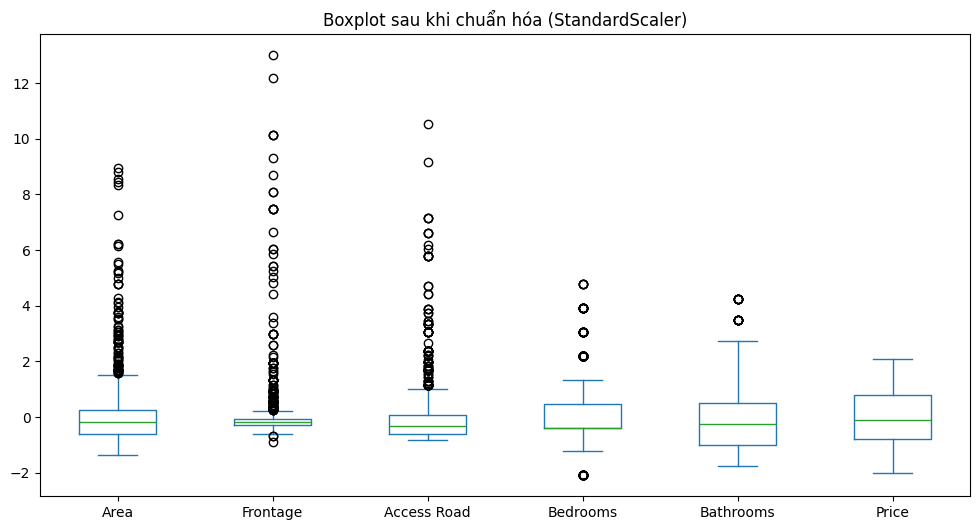

In [58]:
# V·∫Ω Boxplot sau khi chu·∫©n h√≥a
vietnam_housing_clean[cols_to_scale].plot(kind="box", figsize=(12,6), title="Boxplot sau khi chu·∫©n h√≥a (StandardScaler)")

Tr∆∞·ªõc / Sau: 1774 / 1346


<Axes: title={'center': 'Boxplot sau khi lo·∫°i Outlier (IQR)'}>

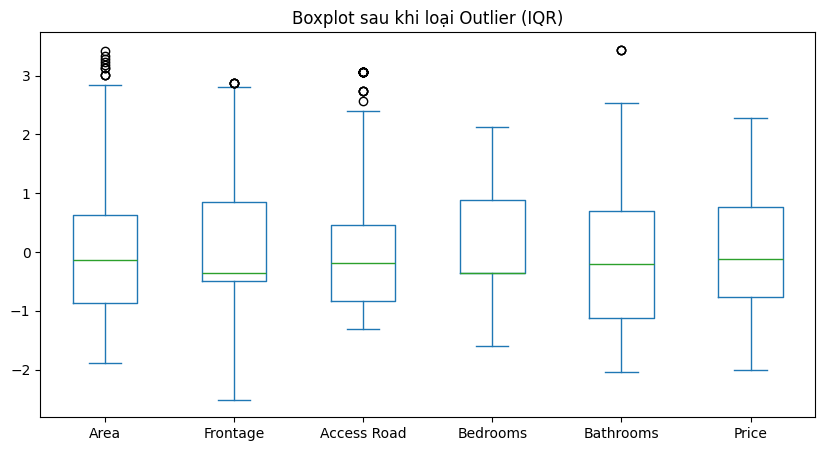

In [59]:
cols = ['Area','Frontage','Access Road','Bedrooms','Bathrooms']

mask = np.ones(len(vietnam_housing_clean), bool)
for c in cols:
    q1, q3 = vietnam_housing_clean[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    mask &= (vietnam_housing_clean[c] >= q1 - 1.5*iqr) & (vietnam_housing_clean[c] <= q3 + 1.5*iqr)

vietnam_housing_clean = vietnam_housing_clean[mask].copy()
print("Tr∆∞·ªõc / Sau:", len(mask), "/", len(vietnam_housing_clean))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = ['Area','Frontage','Access Road','Bedrooms','Bathrooms','Price']
vietnam_housing_clean[scale_cols] = scaler.fit_transform(vietnam_housing_clean[scale_cols])

vietnam_housing_clean[scale_cols].plot(kind='box', figsize=(10,5),
    title='Boxplot sau khi lo·∫°i Outlier (IQR)')


In [60]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['Area', 'Frontage', 'Access Road', 'Bedrooms', 'Bathrooms',
        'Price'], dtype=object),
 'n_features_in_': 6,
 'n_samples_seen_': np.int64(1346),
 'mean_': array([-0.22722484, -0.22049658, -0.2673386 , -0.13819918, -0.08961507,
        -0.10222072]),
 'var_': array([0.25662883, 0.0230391 , 0.17622945, 0.47883235, 0.67409157,
        0.90098916]),
 'scale_': array([0.50658546, 0.15178636, 0.41979692, 0.69197713, 0.8210308 ,
        0.94920449])}

In [61]:
vietnam_housing_clean[['Frontage','Access Road']].describe()


Frontage   Access Road
count  1.346000e+03  1.346000e+03
mean   1.108573e-16 -1.319730e-17
std    1.000372e+00  1.000372e+00
min   -2.514534e+00 -1.318513e+00
25%   -4.940764e-01 -8.325996e-01
50%   -3.593792e-01 -1.847146e-01
75%    8.528952e-01  4.631704e-01
max    2.873353e+00  3.054710e+00

In [62]:
vietnam_housing_clean[['Frontage','Access Road']].describe()


Frontage   Access Road
count  1.346000e+03  1.346000e+03
mean   1.108573e-16 -1.319730e-17
std    1.000372e+00  1.000372e+00
min   -2.514534e+00 -1.318513e+00
25%   -4.940764e-01 -8.325996e-01
50%   -3.593792e-01 -1.847146e-01
75%    8.528952e-01  4.631704e-01
max    2.873353e+00  3.054710e+00

# TH·ªêNG K√ä M√î T·∫¢

In [ ]:
from IPython.display import display  

print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu:", vietnam_housing_clean.shape)
print("\n== Th√¥ng tin c·ªôt ==")
display(pd.DataFrame({
    "dtype": vietnam_housing_clean.dtypes.astype(str),
    "missing": vietnam_housing_clean.isna().sum(),
    "missing_rate": (vietnam_housing_clean.isna().mean()*100).round(2).astype(str) + "%"
}).sort_index())

In [ ]:
#Th·ªëng k√™ m√¥ t·∫£ cho bi·∫øn s·ªë
num_cols = vietnam_housing_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n== Th·ªëng k√™ bi·∫øn s·ªë ({len(num_cols)} c·ªôt) ==")
display(vietnam_housing_clean[num_cols].describe().T)

In [ ]:
#Th·ªëng k√™ cho bi·∫øn ph√¢n lo·∫°i (n·∫øu c√≤n)
cat_cols = vietnam_housing_clean.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
if cat_cols:
    print(f"\n== Th·ªëng k√™ bi·∫øn ph√¢n lo·∫°i ({len(cat_cols)} c·ªôt) ==")
    def cat_summary(s: pd.Series):
        vc = s.value_counts(dropna=False)
        return pd.Series({
            "n_unique": s.nunique(dropna=False),
            "top": vc.index[0],
            "top_freq": int(vc.iloc[0]),
            "top_freq_rate": f"{(vc.iloc[0]/len(s)*100):.2f}%"
        })
    display(pd.DataFrame({c: cat_summary(vietnam_housing_clean[c]) for c in cat_cols}).T)
else:
    print("\n== Kh√¥ng c√≤n bi·∫øn ph√¢n lo·∫°i ==")

In [ ]:
#Ma tr·∫≠n t∆∞∆°ng quan nhanh
print("\n== T∆∞∆°ng quan gi·ªØa c√°c bi·∫øn s·ªë (Top 10 c·∫∑p m·∫°nh nh·∫•t tuy·ªát ƒë·ªëi) ==")
corr = vietnam_housing_clean[num_cols].corr(numeric_only=True)
corr_abs = corr.abs().where(~np.eye(len(corr), dtype=bool))
pairs = (
    corr_abs.unstack()
    .dropna()
    .sort_values(ascending=False)
    .head(10)
)
display(pairs.to_frame("abs_corr"))

# V·∫Ω pairplot gi·ªØa c√°c bi·∫øn c√≥ t∆∞∆°ng quan cao nh·∫•t

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Danh s√°ch c√°c bi·∫øn c√≥ t∆∞∆°ng quan cao 
strong_corr_cols = ['House_direction_cos', 'Balcony_direction_cos',
                    'House_direction_sin', 'Balcony_direction_sin',
                    'Floors', 'Bathrooms', 'Bedrooms', 'Area', 'Frontage']

# V·∫Ω pairplot
sns.pairplot(df[strong_corr_cols], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot gi·ªØa c√°c bi·∫øn c√≥ t∆∞∆°ng quan cao nh·∫•t", y=1.02)
plt.show()

## PH√ÇN C·ª§M D·ªÆ LI·ªÜU

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# ƒê·ªãnh nghƒ©a c√°c c·ªôt s·ªë v√† c·ªôt ph√¢n lo·∫°i
num_cols = ['Area', 'Access Road', 'Frontage', 'Bedrooms', 'Bathrooms', 'Price',
            'House_direction_sin', 'House_direction_cos',
            'Balcony_direction_sin', 'Balcony_direction_cos','Legal_status_1','Furniture_status_1']



In [45]:
num_cols = [c for c in num_cols if c in vietnam_housing_clean.columns]
X = vietnam_housing_clean[num_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Ch·∫°y KMeans
from sklearn.cluster import KMeans
km_inertias, km_scores = [], []
for k in range(3, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X_scaled, km.labels_))
    print(f"k={k} | Inertia={km.inertia_:.2f} | Silhouette={km_scores[-1]:.4f}")


k=3 | Inertia=10451.72 | Silhouette=0.2018
k=4 | Inertia=9094.63 | Silhouette=0.2212
k=5 | Inertia=7801.69 | Silhouette=0.2331
k=6 | Inertia=6915.47 | Silhouette=0.2262
k=7 | Inertia=6130.99 | Silhouette=0.2553
k=8 | Inertia=5798.39 | Silhouette=0.2230
k=9 | Inertia=5521.41 | Silhouette=0.2210


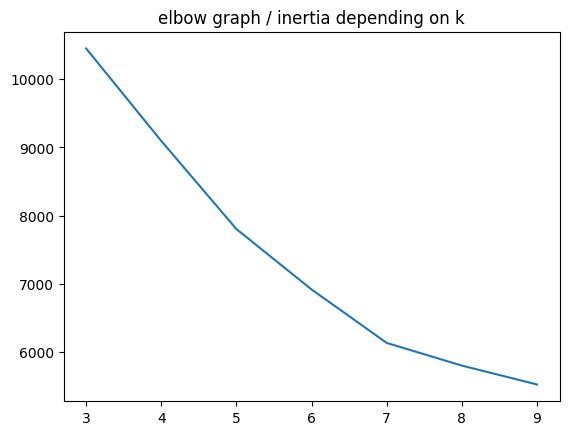

k = 3, Silhouette Score = 0.197
k = 4, Silhouette Score = 0.221
k = 5, Silhouette Score = 0.249
k = 6, Silhouette Score = 0.241
k = 7, Silhouette Score = 0.217
k = 8, Silhouette Score = 0.245
k = 9, Silhouette Score = 0.206


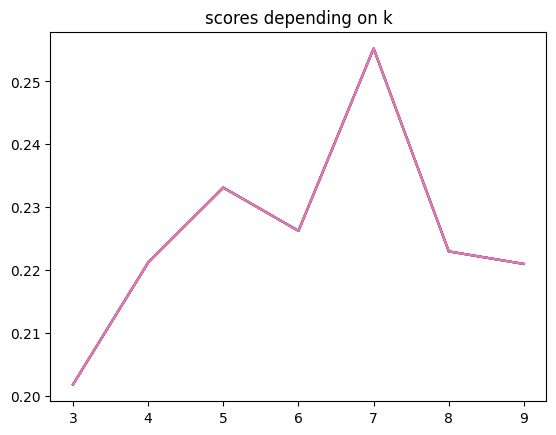

In [50]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()
# B·ªï sung ki·ªÉm tra b·∫±ng Silhouette Score
from sklearn.metrics import silhouette_score
for k in range(3, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    print(f"k = {k}, Silhouette Score = {score:.3f}")
    sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()


In [51]:
# G√°n nh√£n cho c√°c m·∫´u d·ªØ li·ªáu d·ª±a v√†o m√¥ h√¨nh K-Means v·ªõi s·ªë c·ª•m l√† 5 v√† 6
km = KMeans(n_clusters=4).fit(X_scaled)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
clusters = km.labels_
#Info for each cluster
for k in range(4):
 print(f'Cluster nb : {k}')
 print(X[X.Label == k].describe().iloc[:, 1:-1])
 print('\n\n')
 

Cluster nb : 0
       Access Road    Frontage    Bedrooms   Bathrooms       Price  \
count   223.000000  223.000000  223.000000  223.000000  223.000000   
mean      0.054611    0.117497   -0.125701   -0.153616   -0.008282   
std       0.978852    1.028642    1.043688    1.019942    1.018364   
min      -1.156542   -2.514534   -1.592797   -2.036702   -1.985698   
25%      -0.816402   -0.494076   -0.353546   -1.123815   -0.767988   
50%      -0.184715   -0.224682   -0.353546   -0.210927   -0.099441   
75%       0.544156    0.852895    0.885705    0.701960    0.712366   
max       3.054710    2.738655    2.124956    2.527735    2.288226   

       House_direction_sin  House_direction_cos  Balcony_direction_sin  \
count         2.230000e+02         2.230000e+02           2.230000e+02   
mean         -5.336323e-01        -4.484305e-01          -5.426009e-01   
std           5.089194e-01         5.074089e-01           4.993026e-01   
min          -1.000000e+00        -1.000000e+00          -

In [52]:
# G√°n nh√£n cho c√°c m·∫´u d·ªØ li·ªáu d·ª±a v√†o m√¥ h√¨nh K-Means v·ªõi s·ªë c·ª•m l√† 5 v√† 6
km = KMeans(n_clusters=5).fit(X_scaled)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
clusters = km.labels_
#Info for each cluster
for k in range(5):
 print(f'Cluster nb : {k}')
 print(X[X.Label == k].describe().iloc[:, 1:-1])
 print('\n\n')

Cluster nb : 0
       Access Road    Frontage    Bedrooms   Bathrooms       Price  \
count   149.000000  149.000000  149.000000  149.000000  149.000000   
mean      0.057916    0.020123   -0.004227    0.052524   -0.030055   
std       1.080690    0.983255    1.049569    0.997172    1.001807   
min      -1.221331   -1.841048   -1.592797   -2.036702   -1.780359   
25%      -0.832600   -0.494076   -0.353546   -1.123815   -0.767988   
50%      -0.184715   -0.494076   -0.353546   -0.210927   -0.099441   
75%       0.463170    0.852895    0.885705    0.701960    0.616859   
max       3.054710    2.873353    2.124956    3.440622    2.192719   

       House_direction_sin  House_direction_cos  Balcony_direction_sin  \
count         1.490000e+02         1.490000e+02           1.490000e+02   
mean          9.865772e-01        -1.342282e-02           9.798658e-01   
std           1.154648e-01         1.154648e-01           1.409331e-01   
min           1.224647e-16        -1.000000e+00           

In [54]:
print("KMeans n_clusters:", km.n_clusters)
print("Shape of X_scaled:", X_scaled.shape)
print("Unique cluster labels:", np.unique(X_scaled['Label']))
print("Number of duplicates:", vietnam_housing_clean.duplicated().sum())


KMeans n_clusters: 5
Shape of X_scaled: (1346, 11)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## DBSCAN

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [58]:
df = vietnam_housing_clean.copy()
if 'Access Road' in df.columns and 'Access_Road' not in df.columns:
    df = df.rename(columns={'Access Road':'Access_Road'})
if 'Access Road' in df.columns and 'Access_Road' not in df.columns:
    df.rename(columns={'Access Road':'Access_Road'}, inplace=True)

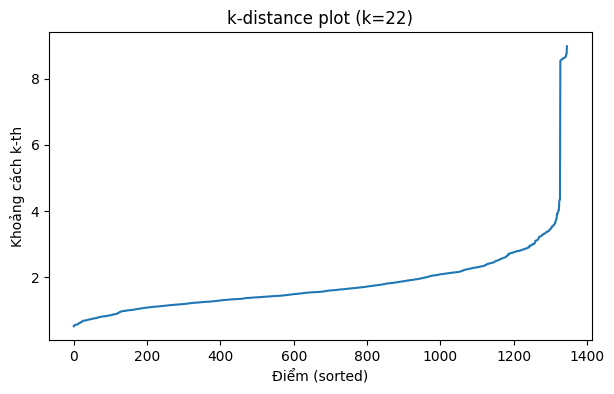

In [61]:
k = max(5, 2*X_scaled.shape[1])  # rule of thumb
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
dist, _ = nbrs.kneighbors(X_scaled)
kdist = np.sort(dist[:, -1])

plt.figure(figsize=(7,4))
plt.plot(kdist); plt.title(f'k-distance plot (k={k})')
plt.xlabel('ƒêi·ªÉm (sorted)'); plt.ylabel('Kho·∫£ng c√°ch k-th'); plt.show()


In [62]:
for eps_test in [1.2, 1.5, 1.8, 2.0, 2.3, 2.5]:
    db = DBSCAN(eps=eps_test, min_samples=10).fit(X)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise = (labels == -1).mean()
    print(f"eps={eps_test}: c·ª•m={n_clusters}, noise={noise:.2%}")


eps=1.2: c·ª•m=6, noise=45.47%
eps=1.5: c·ª•m=5, noise=20.21%
eps=1.8: c·ª•m=3, noise=9.06%
eps=2.0: c·ª•m=2, noise=4.83%
eps=2.3: c·ª•m=1, noise=1.26%
eps=2.5: c·ª•m=1, noise=0.37%


In [63]:
# DBSCAN v·ªõi eps = 1.5
db = DBSCAN(eps=1.5, min_samples=10).fit(X_scaled)
df['db'] = db.labels_

# K-Means ƒë·ªÉ so s√°nh
km = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
df['km'] = km.labels_

# Ch·ªâ t√≠nh Silhouette n·∫øu DBSCAN ra >=2 c·ª•m kh√°c nhau (b·ªè noise -1)
mask = df['db'] != -1
n_clusters_db = len(set(df['db'][mask]))

if n_clusters_db > 1:
    print("Silhouette DBSCAN:", silhouette_score(X[mask], df['db'][mask]))
else:
    print("DBSCAN ch·ªâ c√≥ 1 c·ª•m h·ª£p l·ªá ‚Üí kh√¥ng t√≠nh ƒë∆∞·ª£c Silhouette")

print("Silhouette KMeans:", silhouette_score(X, df['km']))


Silhouette DBSCAN: 0.13708533759085306
Silhouette KMeans: 0.22498044703569403


## Hierarchical clustering 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as pl

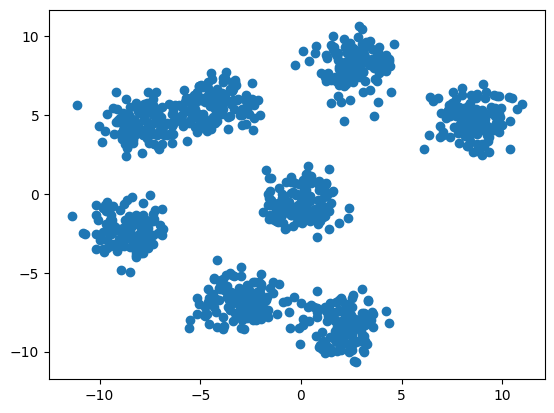

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. 
# X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2,
random_state=800)
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.show()

In [ ]:
# Generate distance matrix with 'linkage' function
distances = linkage(X_scaled, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


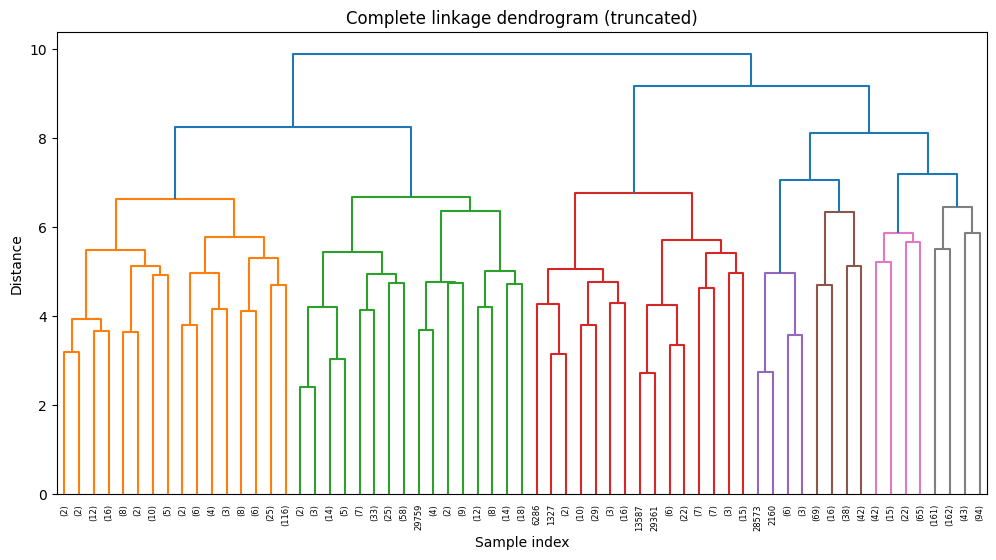

In [91]:
# select numeric columns only (or list the feature column names you want)
numeric_cols = vietnam_housing_clean.select_dtypes(include=[np.number]).columns.tolist()
X_hier = vietnam_housing_clean[numeric_cols].dropna()

if X_hier.shape[0] < 2 or X_hier.shape[1] < 1:
    raise ValueError("Not enough numeric rows/columns for hierarchical clustering. Check vietnam_housing_clean.")

# convert to numpy array (float) for linkage
X_vals = X_hier.values.astype(float)

complete_clustering = linkage(X_vals, method="complete", metric="euclidean")
average_clustering  = linkage(X_vals, method="average",  metric="euclidean")
single_clustering   = linkage(X_vals, method="single",   metric="euclidean")

# optional: plot a truncated dendrogram for the complete linkage
plt.figure(figsize=(12, 6))
dendrogram(complete_clustering, truncate_mode='level', p=5, labels=X_hier.index)
plt.title("Complete linkage dendrogram (truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

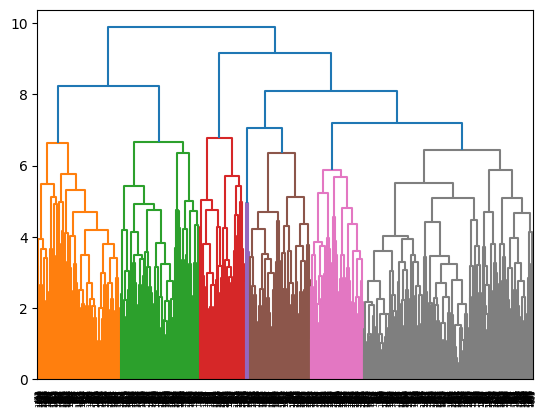

In [92]:
dendrogram(complete_clustering)
plt.show()

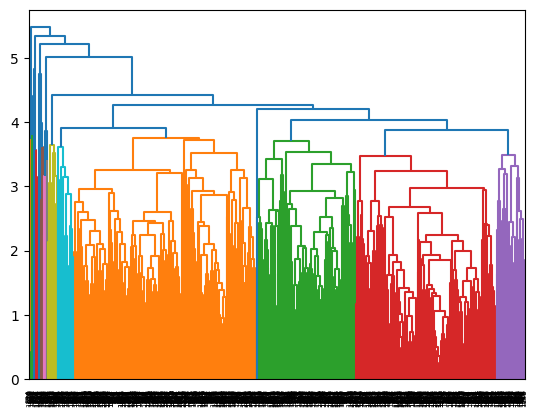

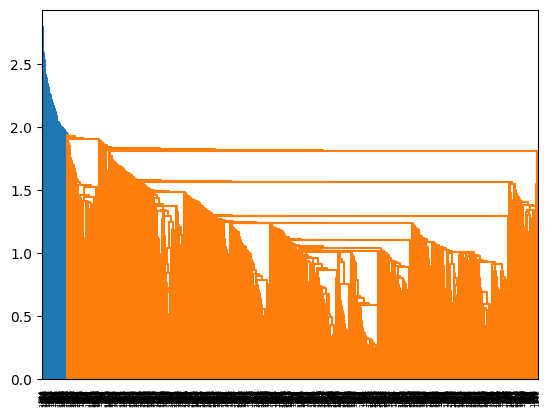

In [93]:
dendrogram(average_clustering)
plt.show()
dendrogram(single_clustering)
plt.show()

best_k=2, silhouette=0.1448


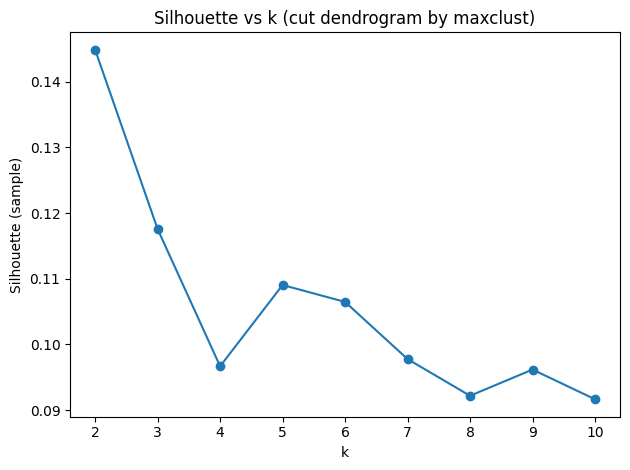

In [96]:
# Gi·∫£ s·ª≠ `X_hier` l√† DataFrame
n = len(X_hier)

# Ch·ªçn m·ªôt m·∫´u ng·∫´u nhi√™n (s·ªë ƒëi·ªÉm kh√¥ng qu√° 2000)
idx = np.random.default_rng(42).choice(n, size=min(2000, n), replace=False)

# Tr√≠ch xu·∫•t m·∫´u ng·∫´u nhi√™n t·ª´ X_hier b·∫±ng iloc
X_s = X_hier.iloc[idx]  # S·ª≠ d·ª•ng iloc ƒë·ªÉ tr√≠ch xu·∫•t c√°c h√†ng theo ch·ªâ s·ªë

# T·∫°o d·∫£i gi√° tr·ªã k t·ª´ 2 ƒë·∫øn 10
k_grid = range(2, 11)

# T√≠nh silhouette score cho m·ªói k
sil_scores = [silhouette_score(X_s, fcluster(Z, t=k, criterion="maxclust")[idx]) for k in k_grid]

# L·∫•y k t·ªëi ∆∞u
best_k = list(k_grid)[int(np.nanargmax(sil_scores))]

# In ra k·∫øt qu·∫£
print(f"best_k={best_k}, silhouette={np.nanmax(sil_scores):.4f}")

# V·∫Ω ƒë·ªì th·ªã silhouette score theo k
import matplotlib.pyplot as plt
plt.plot(list(k_grid), sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette (sample)")
plt.title("Silhouette vs k (cut dendrogram by maxclust)")
plt.tight_layout()
plt.show()


In [106]:
# Ki·ªÉm tra l·∫°i X_s v√† mask
print(X_s.iloc[mask].shape)  # Ki·ªÉm tra s·ªë c·ªôt sau khi √°p d·ª•ng mask

# T√≥m t·∫Øt c·ª•m
summary_rows = []
for c in sorted(np.unique(labels)):
    mask = (labels_ser.values == c)
    
    # L·∫•y median c·ªßa c√°c c·ªôt s·ªë trong X_s
    row = {"Cluster": int(c), "Count": int(mask.sum())}
    
    # S·ª≠ d·ª•ng iloc thay v√¨ values ƒë·ªÉ gi·ªØ l·∫°i c·ªôt
    row.update(X_s.iloc[mask][numeric_cols].median().to_dict())
    
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).sort_values("Cluster").reset_index(drop=True)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
from IPython.display import display
display(summary_df)


(442, 10)


Cluster  Count      Area  Frontage  Bedrooms  Bathrooms     Price  \
0        1    442 -0.115645 -0.278561 -0.353546  -0.210927 -0.099441   
1        2    904 -0.170807 -0.494076 -0.353546  -0.210927 -0.154358   

   House_direction_sin  House_direction_cos  Balcony_direction_sin  \
0                  0.0                  1.0                    0.0   
1                  0.0                  1.0                    0.0   

   Balcony_direction_cos  
0                    1.0  
1                    1.0

/tmp/ipykernel_65744/3459741769.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=target, data=df_cluster, palette="Set2")


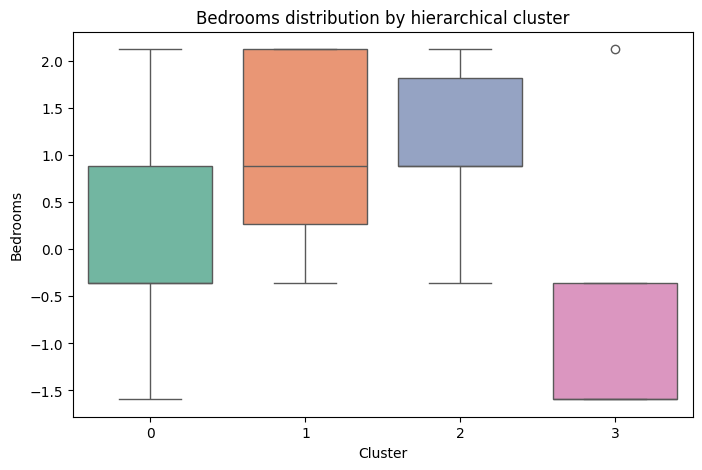

In [116]:
from scipy.cluster.hierarchy import cut_tree
import seaborn as sns
import matplotlib.pyplot as plt
# C·∫Øt c√¢y dendrogram th√†nh 2 c·ª•m (ƒë·ªïi s·ªë n·∫øu mu·ªën)
cluster_labels = cut_tree(average_clustering, n_clusters=4).reshape(-1, )

# G·∫Øn nh√£n c·ª•m v√†o dataframe ƒëang d√πng (X_hier ho·∫∑c vietnam_housing_scaled)
df_cluster = X_hier.copy()
df_cluster["Cluster"] = cluster_labels

# Ch·ªçn bi·∫øn ƒë·ªÉ xem √Ω nghƒ©a (v√≠ d·ª• 'Price')
target = "Bedrooms"

# V·∫Ω boxplot ƒë·ªÉ so s√°nh ph√¢n b·ªë bi·∫øn theo c·ª•m
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y=target, data=df_cluster, palette="Set2")
plt.title(f"{target} distribution by hierarchical cluster")
plt.show()

In [117]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
# 1. Chu·∫©n h√≥a
X = vietnam_housing_clean[num_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)
# 2. Linkage
Z = linkage(X_scaled, method='ward')
# 3. C·∫Øt c·ª•m (v√≠ d·ª• 4 c·ª•m)
labels = fcluster(Z, t=2, criterion='maxclust')
# 4. Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print("‚úÖ Silhouette Score:", sil_score)

‚úÖ Silhouette Score: 0.30445706644855736


In [118]:
for k in range(3, 7):
    labels_hier = fcluster(Z, t=k, criterion='maxclust')
    silhouette = silhouette_score(X_scaled, labels_hier)
    print(f"Silhouette Score for k={k}: {silhouette:.4f}")


Silhouette Score for k=3: 0.3200
Silhouette Score for k=4: 0.2168
Silhouette Score for k=5: 0.2453
Silhouette Score for k=6: 0.2118


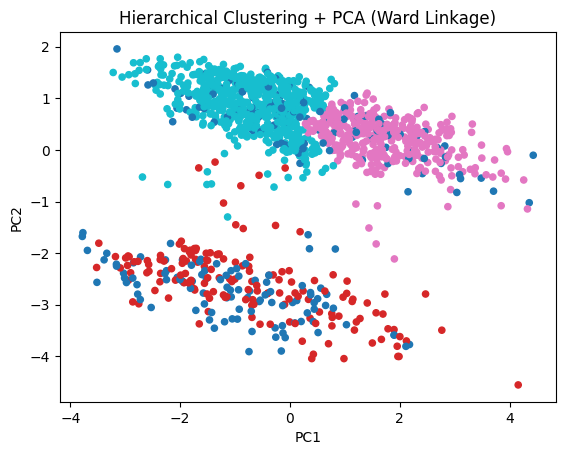

In [119]:
from sklearn.decomposition import PCA

# Ch·ªçn s·ªë l∆∞·ª£ng th√†nh ph·∫ßn PCA nh·ªè h∆°n ho·∫∑c b·∫±ng s·ªë ƒë·∫∑c tr∆∞ng trong d·ªØ li·ªáu (·ªü ƒë√¢y l√† 5)
pca = PCA(n_components=3)  # Ho·∫∑c c√≥ th·ªÉ ch·ªçn n_components=2 ƒë·ªÉ gi·∫£m xu·ªëng 2 chi·ªÅu
X_reduced = pca.fit_transform(X_scaled)

# Ti·∫øn h√†nh ph√¢n c·ª•m v·ªõi d·ªØ li·ªáu gi·∫£m chi·ªÅu
Z = linkage(X_reduced, method='ward')

# C·∫Øt c·ª•m v·ªõi s·ªë c·ª•m t√πy ch·ªçn
labels_hier = fcluster(Z, t=4, criterion='maxclust')

# Hi·ªÉn th·ªã k·∫øt qu·∫£ tr·ª±c quan
pca = PCA(n_components=2)  # Gi·∫£m xu·ªëng 2 chi·ªÅu ƒë·ªÉ tr·ª±c quan h√≥a
X_pca = pca.fit_transform(X_scaled)

# V·∫Ω scatter plot v·ªõi c√°c c·ª•m kh√°c nhau
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hier, cmap='tab10', s=20)
plt.title("Hierarchical Clustering + PCA (Ward Linkage)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [113]:
import numpy as np

print("S·ªë c·ª•m th·∫≠t s·ª±:", len(np.unique(labels)))
print("Ph√¢n b·ªë nh√£n:", np.unique(labels, return_counts=True))


S·ªë c·ª•m th·∫≠t s·ª±: 2
Ph√¢n b·ªë nh√£n: (array([1, 2], dtype=int32), array([ 223, 1123]))


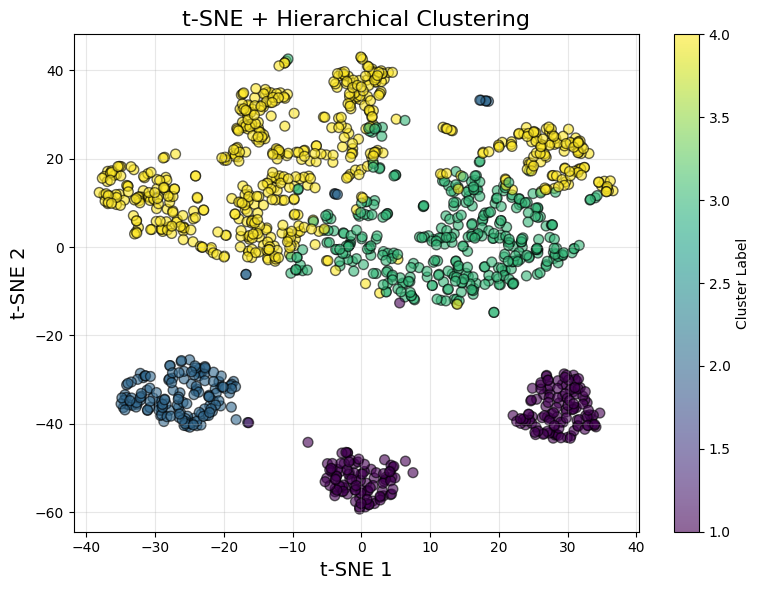

In [120]:
from sklearn.manifold import TSNE

# √Åp d·ª•ng t-SNE ƒë·ªÉ gi·∫£m chi·ªÅu xu·ªëng 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# V·∫Ω scatter plot sau khi gi·∫£m chi·ªÅu b·∫±ng t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_hier, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
plt.title("t-SNE + Hierarchical Clustering", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=14)
plt.ylabel("t-SNE 2", fontsize=14)
plt.colorbar(label='Cluster Label')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


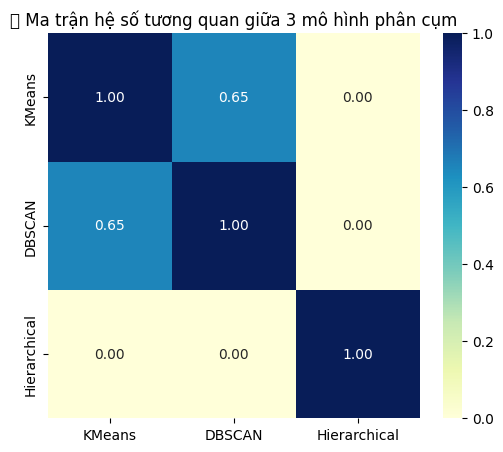

‚úÖ Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ph∆∞∆°ng ph√°p ph√¢n c·ª•m:


KMeans    DBSCAN  Hierarchical
KMeans        1.000000  0.653703           0.0
DBSCAN        0.653703  1.000000           0.0
Hierarchical  0.000000  0.000000           1.0

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ Gi·∫£ s·ª≠ c√°c nh√£n ƒë√£ c√≥:
# df['km'] ‚Äì KMeans
# df['db'] ‚Äì DBSCAN
# df_cluster['Cluster'] ‚Äì Hierarchical

# 1Ô∏è‚É£ G·ªôp nh√£n l·∫°i th√†nh m·ªôt DataFrame chung
compare_df = pd.DataFrame({
    'KMeans': df['km'].values,
    'DBSCAN': df['db'].values,
    'Hierarchical': df_cluster['Cluster'].reindex(df.index, fill_value=-1).values
})

# 2Ô∏è‚É£ ƒê·∫£m b·∫£o c√°c gi√° tr·ªã ƒë·ªÅu l√† s·ªë (tr√°nh l·ªói khi t√≠nh)
for col in compare_df.columns:
    le = LabelEncoder()
    compare_df[col] = le.fit_transform(compare_df[col])

# 3Ô∏è‚É£ H√†m t√≠nh Cram√©r‚Äôs V gi·ªØa hai ph√¢n c·ª•m
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# 4Ô∏è‚É£ T·∫°o ma tr·∫≠n h·ªá s·ªë t∆∞∆°ng quan
methods = ['KMeans', 'DBSCAN', 'Hierarchical']
coef_matrix = pd.DataFrame(index=methods, columns=methods, dtype=float)

for i in methods:
    for j in methods:
        coef_matrix.loc[i, j] = cramers_v(compare_df[i], compare_df[j])

# 5Ô∏è‚É£ Hi·ªÉn th·ªã ma tr·∫≠n
plt.figure(figsize=(6,5))
sns.heatmap(coef_matrix.astype(float), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("üîπ Ma tr·∫≠n h·ªá s·ªë t∆∞∆°ng quan gi·ªØa 3 m√¥ h√¨nh ph√¢n c·ª•m")
plt.show()

# 6Ô∏è‚É£ In k·∫øt qu·∫£ chi ti·∫øt
print("‚úÖ Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ph∆∞∆°ng ph√°p ph√¢n c·ª•m:")
display(coef_matrix)


In [68]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Gi·∫£ s·ª≠ c√°c nh√£n ƒë√£ c√≥
labels_km = df['km']
labels_db = df['db']
labels_hier = df_cluster['Cluster'].reindex(df.index, fill_value=-1)  # üîÅ ƒë·ªìng b·ªô index

# Lo·∫°i b·ªè noise trong DBSCAN
mask = labels_db != -1

# L·ªçc 3 nh√£n theo mask (s·ª≠ d·ª•ng .loc ƒë·ªÉ tr√°nh l·ªói index)
labels_db_clean = labels_db.loc[mask]
labels_km_clean = labels_km.loc[mask]
labels_hier_clean = labels_hier.loc[mask]

# ‚úÖ T√≠nh ARI v√† AMI
compare_metrics = pd.DataFrame({
    "Model Comparison": [
        "KMeans vs DBSCAN",
        "KMeans vs Hierarchical",
        "DBSCAN vs Hierarchical"
    ],
    "ARI": [
        adjusted_rand_score(labels_km_clean, labels_db_clean),
        adjusted_rand_score(labels_km, labels_hier),
        adjusted_rand_score(labels_db_clean, labels_hier_clean)
    ],
    "AMI": [
        adjusted_mutual_info_score(labels_km_clean, labels_db_clean),
        adjusted_mutual_info_score(labels_km, labels_hier),
        adjusted_mutual_info_score(labels_db_clean, labels_hier_clean)
    ]
})
print(compare_metrics)



         Model Comparison       ARI       AMI
0        KMeans vs DBSCAN  0.403670  0.685296
1  KMeans vs Hierarchical -0.005466 -0.000437
2  DBSCAN vs Hierarchical -0.025004  0.005810
